In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("laptops.csv")
dataset.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [6]:
dataset.year_of_warranty.unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [8]:
dataset.isna().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

In [11]:
#We'll convert to Euros from indian rupes 
dataset['Price']=dataset['Price'].apply(lambda x : (x * 0.011))

In [12]:
dataset.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,263.89,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,395.89,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,562.10,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,439.89,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,314.38,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [23]:
dataset.groupby('OS')['OS'].count()

OS
android      1
chrome      16
dos         32
mac         15
other        2
ubuntu       1
windows    924
Name: OS, dtype: int64

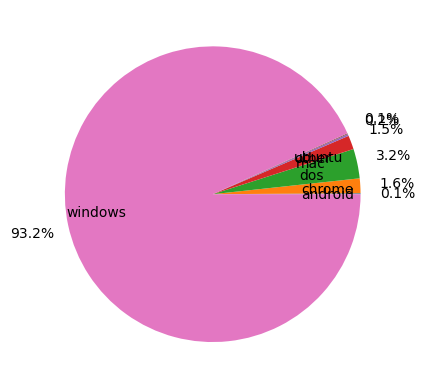

In [29]:
dataset.groupby('OS')['OS'].count()
Labels= "android",'chrome',"dos","mac","other","ubuntu","windows"
plt.pie(dataset.groupby('OS')['OS'].count(),labels=Labels,pctdistance=1.25, labeldistance=.6,autopct='%1.1f%%')
plt.show()

In [30]:
dataset.groupby('OS')['Price'].mean()

OS
android     164.890000
chrome      281.673563
dos         467.649875
mac        2132.628667
other       152.300500
ubuntu      527.890000
windows     854.787643
Name: Price, dtype: float64

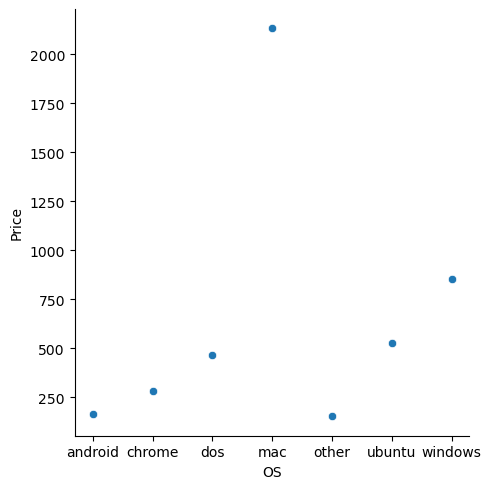

In [34]:
sns.relplot(dataset.groupby('OS')['Price'].mean())

In [36]:
#Do computer cost more with integraded or dedicated gpu on average?
dataset.groupby('gpu_type')['Price'].mean()

gpu_type
apple         2132.628667
dedicated     1217.782439
integrated     603.719250
Name: Price, dtype: float64

In [45]:
#Average Rating on Laptops over 1500euros

In [44]:
dataset.query('Price>1500')['Rating'].mean()

77.73333333333333

In [53]:
#average rating based on the processor brand:
processors=dataset.groupby("processor_brand")['Rating'].mean().reset_index()
processors.head()

,processor_brand,Rating
0,amd,64.887640
1,apple,53.533333
2,intel,63.977305
3,other,31.000000


<Axes: xlabel='Rating', ylabel='processor_brand'>

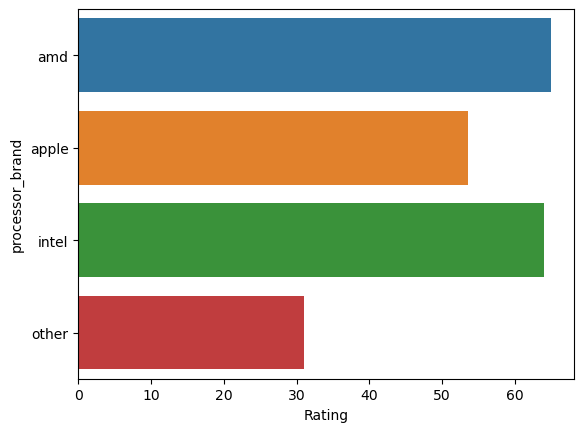

In [60]:
sns.barplot(y=processors.processor_brand,x=processors.Rating,orient='h')

In [61]:
processor_tpye=dataset.groupby("processor_tier")['Rating'].mean().reset_index()

<Axes: xlabel='Rating', ylabel='processor_tier'>

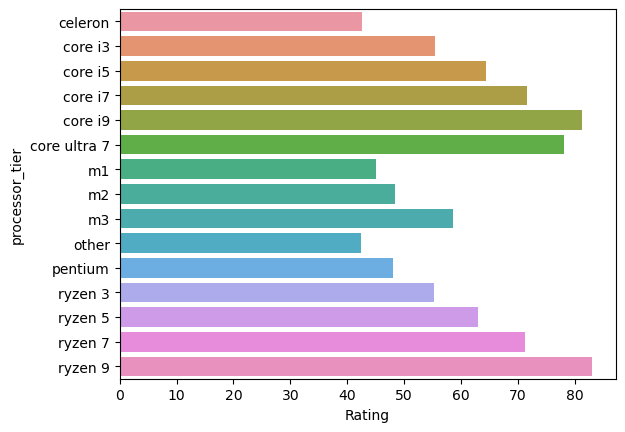

In [62]:
sns.barplot(y=processor_tpye.processor_tier,x=processor_tpye.Rating,orient='h')

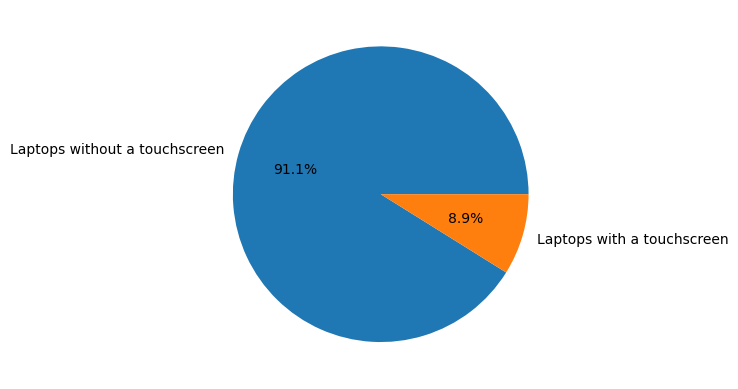

In [65]:
touchscreens = [len(dataset[dataset['is_touch_screen']==False]),len(dataset[dataset['is_touch_screen']==True])]
Labels = 'Laptops without a touchscreen','Laptops with a touchscreen'
plt.pie(touchscreens,labels=Labels,autopct='%1.1f%%')
plt.show()